In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
% matplotlib inline 

In [47]:
df = pd.read_csv('twitter_archive_master.csv')
df.timestamp = pd.to_datetime(df.timestamp)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 11 columns):
Unnamed: 0            2090 non-null int64
tweet_id              2090 non-null int64
timestamp             2090 non-null datetime64[ns]
source                2090 non-null object
text                  2090 non-null object
rating_numerator      2090 non-null int64
rating_denominator    2090 non-null int64
name                  1383 non-null object
stage                 351 non-null object
favourites            2090 non-null int64
retweets              2090 non-null int64
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 179.7+ KB


In [49]:
df.set_index(pd.DatetimeIndex(df.timestamp), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2090 entries, 2017-08-01 16:23:56 to 2015-11-15 22:32:08
Data columns (total 11 columns):
Unnamed: 0            2090 non-null int64
tweet_id              2090 non-null int64
timestamp             2090 non-null datetime64[ns]
source                2090 non-null object
text                  2090 non-null object
rating_numerator      2090 non-null int64
rating_denominator    2090 non-null int64
name                  1383 non-null object
stage                 351 non-null object
favourites            2090 non-null int64
retweets              2090 non-null int64
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 195.9+ KB


In [50]:
# visualise the distribution of favourites for dog stage
dogs = df[df.stage.isnull() == False]

In [54]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 351 entries, 2017-07-26 15:59:51 to 2015-11-26 21:36:12
Data columns (total 11 columns):
Unnamed: 0            351 non-null int64
tweet_id              351 non-null int64
timestamp             351 non-null datetime64[ns]
source                351 non-null object
text                  351 non-null object
rating_numerator      351 non-null int64
rating_denominator    351 non-null int64
name                  186 non-null object
stage                 351 non-null object
favourites            351 non-null int64
retweets              351 non-null int64
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 42.9+ KB


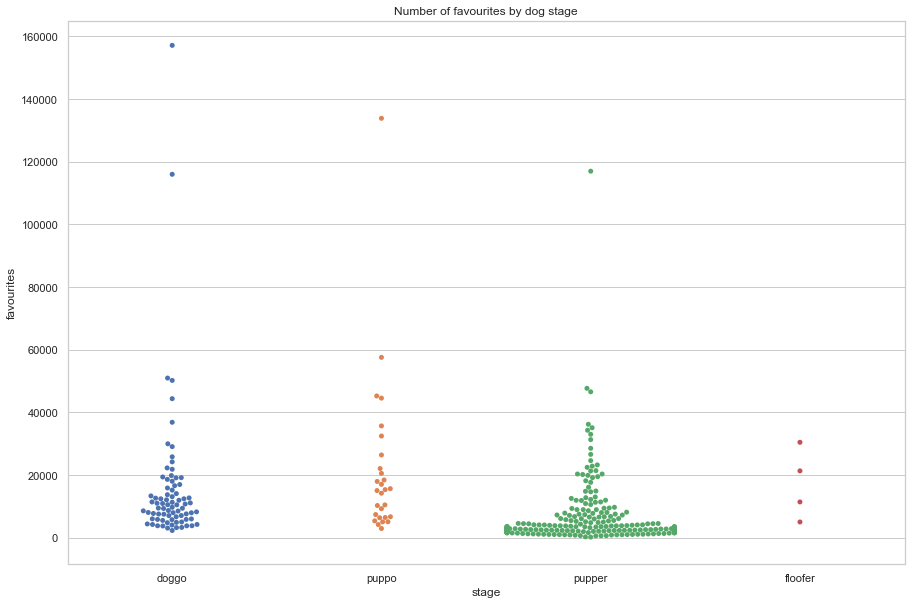

In [73]:
sns.set(style="whitegrid")
plt.subplots(figsize=(15,10))
sns.swarmplot(x=dogs.stage, y=dogs.favourites, data=dogs);
plt.title('Number of favourites by dog stage');

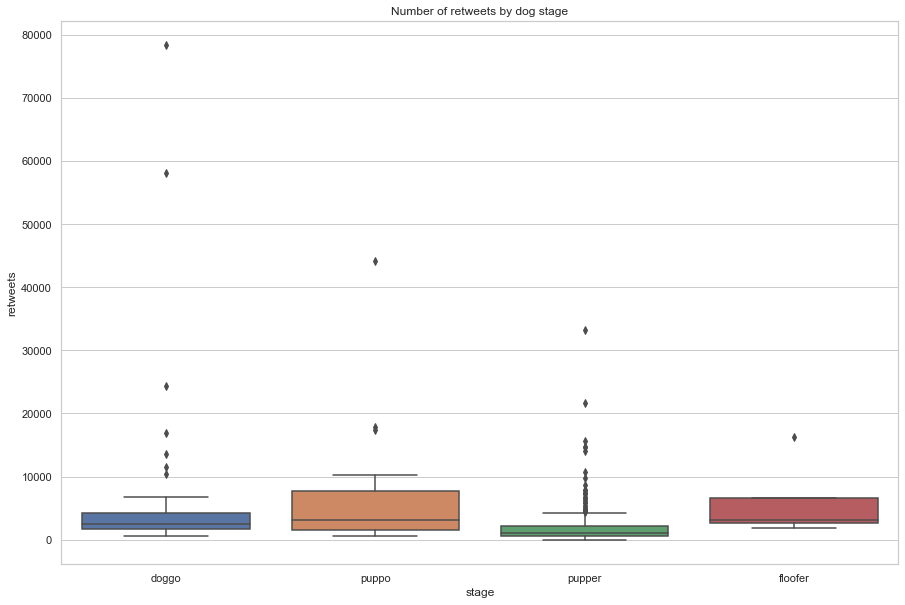

In [72]:
plt.subplots(figsize=(15,10))
sns.boxplot(x=dogs.stage, y=dogs.retweets, data=dogs);
plt.title('Number of retweets by dog stage');

Text(0.5, 1.0, 'Number of retweets by dog stage')

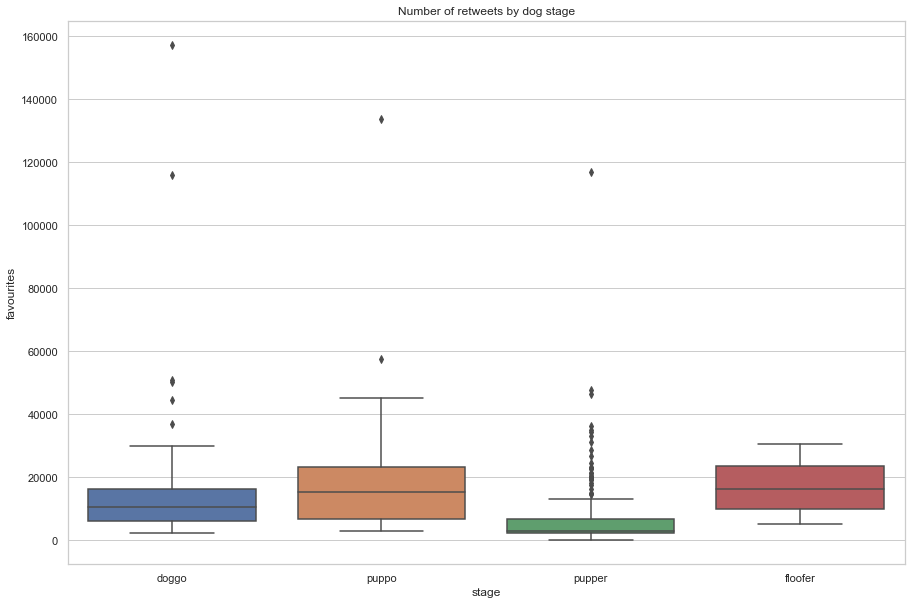

In [74]:
plt.subplots(figsize=(15,10))
sns.boxplot(x=dogs.stage, y=dogs.favourites, data=dogs);
plt.title('Number of retweets by dog stage')

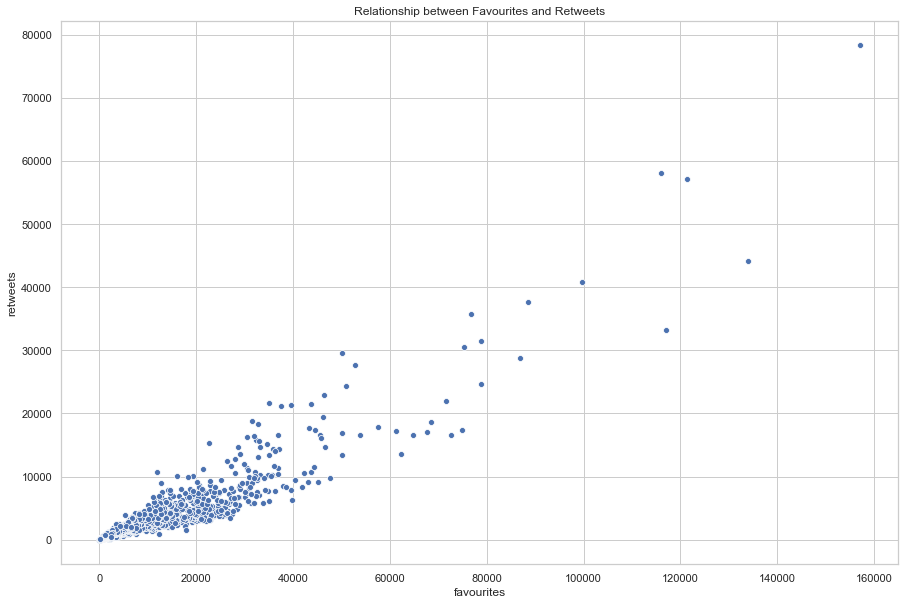

In [76]:
plt.subplots(figsize=(15,10))
sns.scatterplot(x=df.favourites, y=df.retweets, data=df);
plt.title('Relationship between Favourites and Retweets');

In [29]:
np.corrcoef(df.retweets, df.favourites)[1][0]

0.9266718988547383

There appears to be a strong correlation between favourites and retweets which is unsurprising. How is the distribution of favourites to reweets between dog stages.

In [37]:
pupper = df[df.stage == 'pupper']
puppo = df[df.stage == 'puppo']
doggo = df[df.stage == 'doggo']
floofer = df[df.stage == 'floofer']

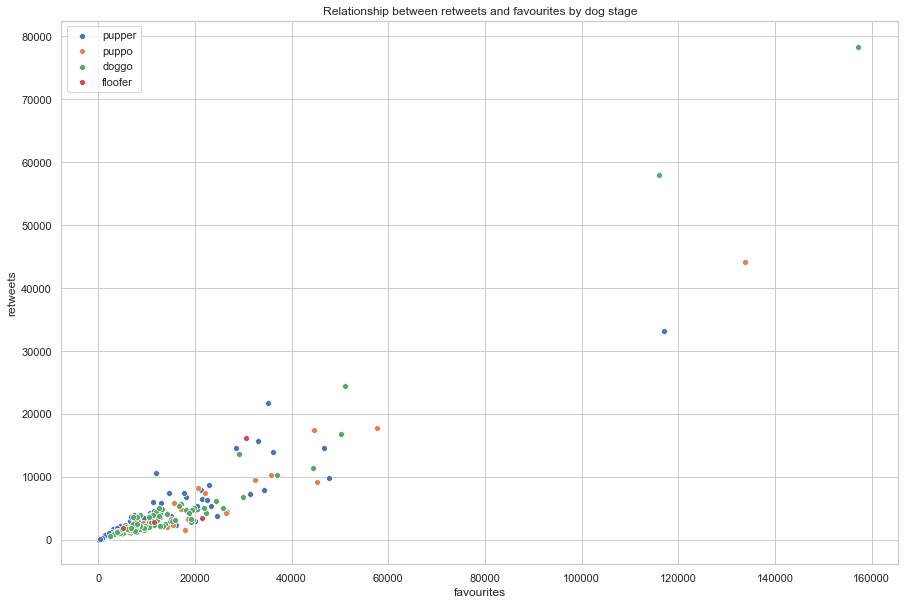

In [77]:
plt.subplots(figsize=(15,10))
ax = sns.scatterplot(x=pupper.favourites, y=pupper.retweets, data=pupper, label='pupper');
ax = sns.scatterplot(x=puppo.favourites, y=puppo.retweets, data=puppo, label='puppo');
ax = sns.scatterplot(x=doggo.favourites, y=doggo.retweets, data=doggo, label='doggo');
ax = sns.scatterplot(x=floofer.favourites, y=floofer.retweets, data=floofer, label='floofer');
ax.legend();
plt.title('Relationship between retweets and favourites by dog stage');

In [45]:
df.stage.value_counts()

pupper     240
doggo       79
puppo       28
floofer      4
Name: stage, dtype: int64

Its significantly harder to compare dog stages against each other due to the lack of data for floofers and puppos. Puppers seem to get slightly higher retweets compared to the proportion of favourites the other stages get. Puppers seem to have significantly more outliers. The higher number of direct mentions of Puppers in tweets seems to indicate that people find adolescent dogs the cutest. This could also just be a passing memeification trend of putting dog stages in tweets, with emphasis on Puppers particularly. Has the mention of dog stages increased on decreased over time?


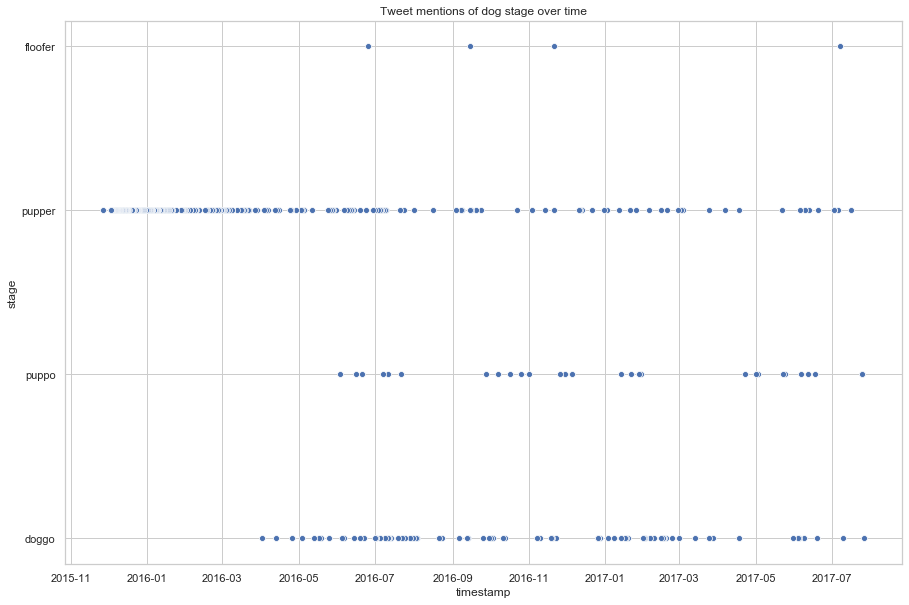

In [78]:
plt.subplots(figsize=(15,10))
sns.scatterplot(x=dogs.timestamp, y=dogs.stage, data=dogs);
plt.title('Tweet mentions of dog stage over time');

It appears the mentions of dog stages is starting to thin out over time. However from the data available, if you wanted to increase the number of favourites and or retweets by mentioning dog stage. A photo and mention of Puppo seems to the best way of ensuring even at the lowest values of retweets and likes that it will be a popular tweet. 